In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sklearn
from sklearn.mixture import GaussianMixture

from functions import *

# Import data
## Import high-resolution data from the Srahrevagh river downstream trap

In [2]:
rr = pd.read_csv(r'C:\Users\adria\Desktop\Growth_of_juvenile_Atlantic_salmon_Reproducible_code\Datasets\Observational\Marine Institute\Atlantic salmon\Downstream\RRDT_historical_natural_cohorts_220321.csv', parse_dates= ['ProcDate'], encoding='latin1')
rr = rr[['ProcDate', 'Lengthmm']]
rr.columns = ['date', 'lengthmm']
rr['river'] = 'Roug'
rr['dayofyear'] = rr.date.dt.dayofyear

In [3]:
len(rr[rr.lengthmm.notna()])

2999

## Import electrofishing data from approx. 40 sites in the Burrishoole catchment

In [4]:
ef = read_multiple_excel(r'C:\Users\adria\Desktop\Growth_of_juvenile_Atlantic_salmon_Reproducible_code\Datasets\Observational\Marine Institute\Atlantic salmon\Electrofishing', sheet_name = 'Fish lengths') # Import all excel files
ef = ef[ef['Species Code'] == 'Sa'] # Filter to contain only salmon
ef = ef[['Date ', 'River', 'Length']] # Extract important columns
ef.columns = ['date', 'river', 'lengthmm'] # Rename columns
ef['lengthmm'] = ef.lengthmm*10
ef['date'] = pd.to_datetime(ef.date)

ef['river'] = ef['river'].str.replace('Fidd01', 'Fidd')
ef['river'] = ef['river'].str.replace('Fidd02', 'Fidd')
ef['river'] = ef['river'].str.replace('Fidd03', 'Fidd')
ef['river'] = ef['river'].str.replace('Rough', 'Roug')
ef['river'] = ef['river'].str.replace('Roug ', 'Roug')
ef['river'] = ef['river'].str.replace('Maum ', 'Maum')
ef['river'] = ef['river'].str.replace('Owen ', 'Owen')

ef['dayofyear'] = ef.date.dt.dayofyear

ef.reset_index(inplace = True, drop = True)

ef = ef[(ef.date.dt.year <= 2019)&(ef.lengthmm.notna())]
ef

,date,river,lengthmm,dayofyear
0,2000-08-08,Cott,50.0,221
1,2000-08-08,Cott,51.0,221
2,2000-08-08,Cott,51.0,221
3,2000-08-08,Cott,52.0,221
4,2000-08-08,Cott,55.0,221
...,...,...,...,...
31136,2019-09-20,Roug,58.0,263
31137,2019-09-20,Roug,60.0,263
31138,2019-09-20,Roug,60.0,263
31139,2019-09-20,Roug,67.0,263


In [5]:
len(ef[(ef.date.dt.year <=2019)&(ef.lengthmm.notna())])

30912

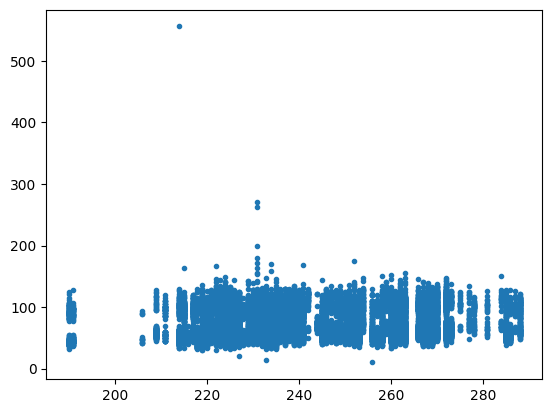

In [6]:
plt.plot(ef.dayofyear, ef.lengthmm, '.') # We assume fish over 250 is either logged in mm or a punctuation issue

In [7]:
typo_index = ef[ef['lengthmm'] > 250].index
ef.iloc[typo_index]
ef.loc[ef['lengthmm'] > 250, 'lengthmm'] = ef.iloc[typo_index].lengthmm/10
ef[ef['lengthmm'] > 250]

typo_index = ef[(ef['lengthmm'] < 25)].index
ef.drop(ef.index[typo_index], inplace = True)
ef.reset_index(inplace = True, drop = True)

typo_index = ef[(ef['lengthmm'] > 150)].index
ef.drop(ef.index[typo_index], inplace = True)
ef.reset_index(inplace = True, drop = True)

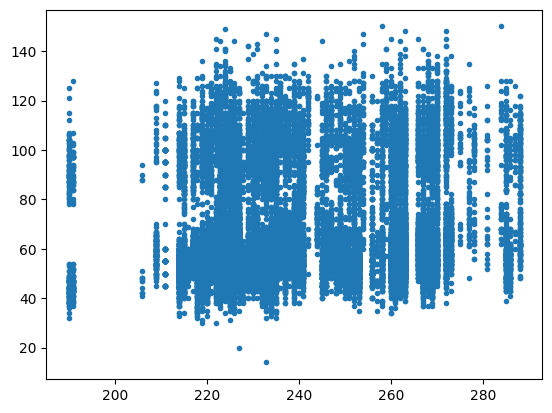

In [8]:
plt.plot(ef.dayofyear, ef.lengthmm, '.')

In [9]:
len(ef[(ef.date.dt.year <=2019)&(ef.lengthmm.notna())])

30893

## Import sea-entry trap data from Mill Race and Salmon Leap

In [10]:
wss_1 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='wss 2000 to 08', parse_dates = ['Date']) # Import observations from the sea-entry traps
wss_1['lengthmm'] = wss_1.Length*10
wss_1 = wss_1[['Date', 'lengthmm']]

wss_2 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='wss  09', parse_dates = ['Date'])
wss_2['lengthmm'] = wss_2['LT']*10
wss_2 = wss_2[['Date', 'lengthmm']]

wss_3 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='2010 wss lt wt', parse_dates = ['Date'])
wss_3['lengthmm'] = wss_3['LT']*10
wss_3 = wss_3[['Date', 'lengthmm']]

wss_4 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='2011 WSS SAMPLE', parse_dates = ['Date'])
wss_4['lengthmm'] = wss_4.LENGTH*10
wss_4 = wss_4[['Date', 'lengthmm']]

wss_5 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='2012', parse_dates = ['Date'])
wss_5['lengthmm'] = wss_5.LENGTH*10
wss_5 = wss_5[['Date', 'lengthmm']]

wss_6 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='2013', parse_dates = ['Date'])
wss_6['lengthmm'] = wss_6['Length (cm)']*10
wss_6 = wss_6[['Date', 'lengthmm']]

wss_7 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='2014', parse_dates = ['Date'])
wss_7['lengthmm'] = wss_7['Length (cm)']*10
wss_7 = wss_7[['Date', 'lengthmm']]

wss_8 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='2015', parse_dates = ['Date'])
wss_8['lengthmm'] = wss_8['Length (cm)']*10
wss_8 = wss_8[['Date', 'lengthmm']]

wss_9 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='2016', parse_dates = ['Date'])
wss_9['lengthmm'] = wss_9['Length (cm)']*10
wss_9 = wss_9[['Date', 'lengthmm']]

wss_10 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='2017', names = ['Trap', 'Date', 'Time', 'Quality', 'Length_cm', 'Weight_g', 'ID'], parse_dates = ['Date'])
wss_10['lengthmm'] = wss_10.Length_cm*10
wss_10 = wss_10[['Date', 'lengthmm']]

wss_11 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='2018', parse_dates = ['Date'])
wss_11['lengthmm'] = wss_11['Length ']*10
wss_11 = wss_11[['Date', 'lengthmm']]

wss_12 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='2019', parse_dates = ['Date Captured'])
wss_12.rename(columns = {'Date Captured': 'Date'}, inplace = True)
wss_12['lengthmm'] = wss_12.Length_cm*10
wss_12 = wss_12[['Date', 'lengthmm']]

wss_13 = pd.read_excel(r'C:\Users\adria\Desktop\Growth in juvenile Atlantic salmon\Datasets\Raw_fish_files\Wild_salmon_smolts_2020-2020.xlsx', sheet_name='2020', parse_dates= ['Date Captured'])
wss_13.rename(columns = {'Date Captured': 'Date'}, inplace = True)
wss_13['lengthmm'] = wss_13.Length_cm*10
wss_13 = wss_13[['Date', 'lengthmm']]

wss = pd.concat([wss_1, wss_2, wss_3, wss_4, wss_5, wss_6, wss_7, wss_8, wss_9, wss_10, wss_11, wss_12, wss_13])
wss.reset_index(inplace = True, drop = True)
wss.columns = ['date', 'lengthmm']
wss['date'] = pd.to_datetime(wss['date'], errors = 'coerce')
wss = wss[wss['lengthmm'].notna()]
wss = wss[wss['date'].notna()]
wss['dayofyear'] = wss.date.dt.dayofyear
wss['river'] = 'Sea-entry'
wss = wss[(wss.date.dt.year <= 2019)&(wss.lengthmm.notna())]
wss

,date,lengthmm,dayofyear,river
0,2000-04-11,133.51,102,Sea-entry
1,2000-04-19,128.84,110,Sea-entry
2,2000-04-25,169.39,116,Sea-entry
3,2000-04-25,134.50,116,Sea-entry
4,2000-04-25,122.17,116,Sea-entry
...,...,...,...,...
3509,2019-06-05,159.00,156,Sea-entry
3510,2019-06-05,128.00,156,Sea-entry
3511,2019-06-07,144.00,158,Sea-entry
3512,2019-06-18,144.00,169,Sea-entry


In [11]:
len(wss[(wss.date.dt.year <= 2019)&(wss.lengthmm.notna())])

3366

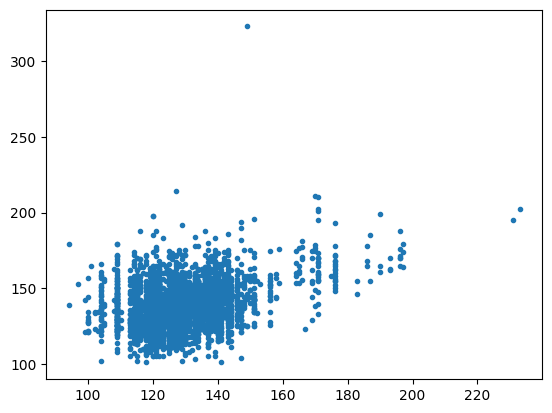

In [12]:
plt.plot(wss.dayofyear, wss.lengthmm, '.') # Again, anything over 250 mm is most definently wrong

In [13]:
wss.loc[wss['lengthmm'] > 250]
wss['lengthmm'].replace(to_replace = 322.8, value = 122.8, inplace = True)
wss.loc[wss['lengthmm'] > 250]

,date,lengthmm,dayofyear,river


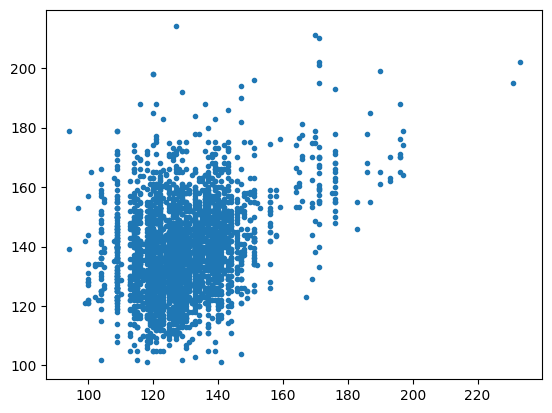

In [14]:
plt.plot(wss.dayofyear, wss.lengthmm, '.')

In [15]:
len(wss[(wss.date.dt.year <= 2019)&(wss.lengthmm.notna())])

3366

In [16]:
df = pd.concat([rr, ef])
df = df[df.lengthmm.notna()]

In [17]:
len(df)

33892

# Classification
## Downstream and Electrofishing

In [18]:
spring_inits = np.array([35, 75, 120]).reshape(-1,1)
autumn_inits = np.array([50, 120]).reshape(-1,1)

In [19]:
spring_model = GaussianMixture(n_components= 3,
                            covariance_type='full',
                            tol=0.001,
                            reg_covar=1e-06,
                            max_iter=100, 
                            n_init=1, init_params='kmeans',
                            weights_init=None,
                            means_init=spring_inits,
                            precisions_init=None,
                            random_state=1,
                            warm_start=False,
                            verbose=0,
                            verbose_interval=10)


autumn_model = GaussianMixture(n_components= 2, 
                            covariance_type='full',
                            tol=0.001,
                            reg_covar=1e-06,
                            max_iter=100, 
                            n_init=1, init_params='kmeans',
                            weights_init=None,
                            means_init=autumn_inits,
                            precisions_init=None,
                            random_state=1,
                            warm_start=False,
                            verbose=0,
                            verbose_interval=10)

In [20]:
# Create the sliding window:
df_grouped = pd.DataFrame()

n = 28



for i in range(min(df.dayofyear), max(df.dayofyear), n):
    if i < 152:
        X = np.array(df[(df['dayofyear'] >= i)&(df['dayofyear'] < i+n)]['lengthmm']).reshape(-1, 1)

        results = spring_model.fit(X)

        df_groups = pd.DataFrame()
        df_groups['date'] = df[(df['dayofyear'] >= i)&(df['dayofyear'] < i+n)]['date']
        df_groups['dayofyear'] = df[(df['dayofyear'] >= i)&(df['dayofyear'] < i+n)]['dayofyear']
        df_groups['lengthmm'] = df[(df['dayofyear'] >= i)&(df['dayofyear'] < i+n)]['lengthmm']
        df_groups['river'] = df[(df['dayofyear'] >= i)&(df['dayofyear'] < i+n)]['river']
        df_groups['age_class'] = results.predict(X)
        df_grouped = pd.concat([df_grouped, df_groups])
    elif i >= 152:
        X = np.array(df[(df['dayofyear'] >= i)&(df['dayofyear'] < i+n)]['lengthmm']).reshape(-1, 1)

        results = autumn_model.fit(X)

        df_groups = pd.DataFrame()
        df_groups['date'] = df[(df['dayofyear'] >= i)&(df['dayofyear'] < i+n)]['date']
        df_groups['dayofyear'] = df[(df['dayofyear'] >= i)&(df['dayofyear'] < i+n)]['dayofyear']
        df_groups['lengthmm'] = df[(df['dayofyear'] >= i)&(df['dayofyear'] < i+n)]['lengthmm']
        df_groups['river'] = df[(df['dayofyear'] >= i)&(df['dayofyear'] < i+n)]['river']
        df_groups['age_class'] = results.predict(X)
        df_grouped = pd.concat([df_grouped, df_groups])



<AxesSubplot: xlabel='dayofyear', ylabel='lengthmm'>

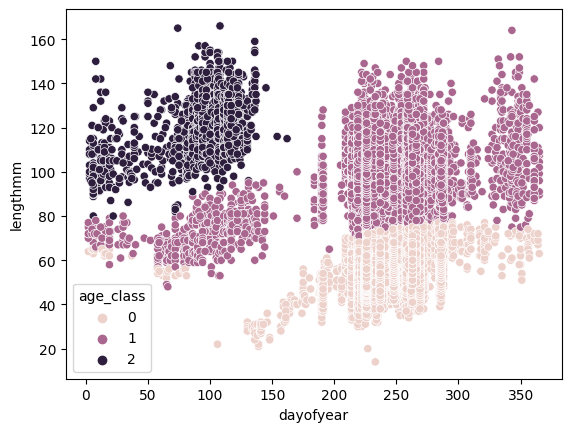

In [21]:
sns.scatterplot(df_grouped, x = 'dayofyear', y = 'lengthmm', hue = 'age_class')

In [22]:
df_grouped.loc[(df_grouped['dayofyear'] < 100)&(df_grouped['lengthmm'] < 75), 'age_class'] = 1

<AxesSubplot: xlabel='dayofyear', ylabel='lengthmm'>

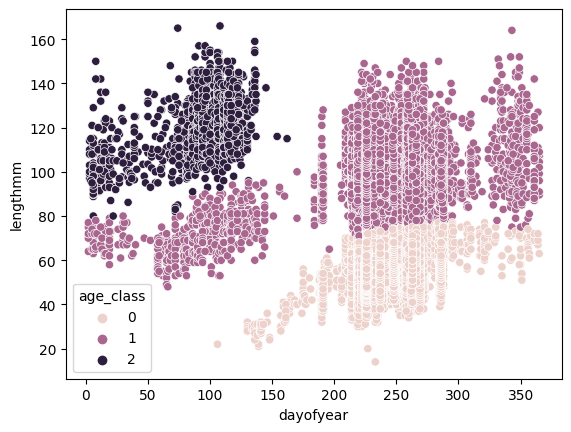

In [23]:
sns.scatterplot(df_grouped, x = 'dayofyear', y = 'lengthmm', hue = 'age_class')

In [24]:
df_grouped['cohort'] = df_grouped.date.dt.year-df_grouped.age_class

## Sea-entry

In [25]:
wss['age_class'] = 2
wss['cohort'] = wss.date.dt.year - wss.age_class

# Merge and Linearlise

In [26]:
df = pd.concat([df_grouped, wss])

In [27]:
df

,date,dayofyear,lengthmm,river,age_class,cohort
0,1998-01-06,6,70.0,Roug,1,1997
1,1998-01-06,6,104.0,Roug,2,1996
2,1998-01-06,6,69.0,Roug,1,1997
3,1998-01-06,6,100.0,Roug,2,1996
4,1998-01-06,6,64.0,Roug,1,1997
...,...,...,...,...,...,...
3509,2019-06-05,156,159.0,Sea-entry,2,2017
3510,2019-06-05,156,128.0,Sea-entry,2,2017
3511,2019-06-07,158,144.0,Sea-entry,2,2017
3512,2019-06-18,169,144.0,Sea-entry,2,2017


<AxesSubplot: xlabel='dayofyear', ylabel='lengthmm'>

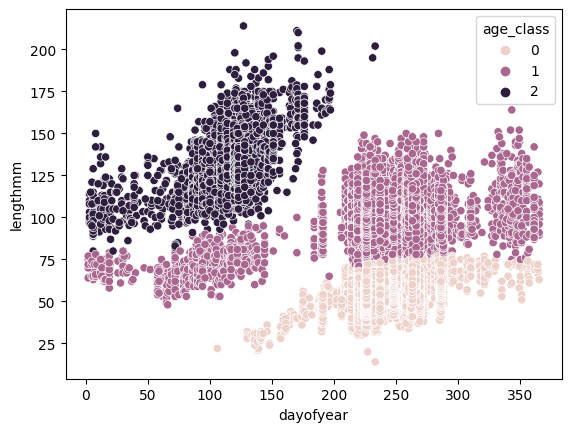

In [28]:
sns.scatterplot(data = df, x ='dayofyear', y = 'lengthmm', hue = 'age_class')

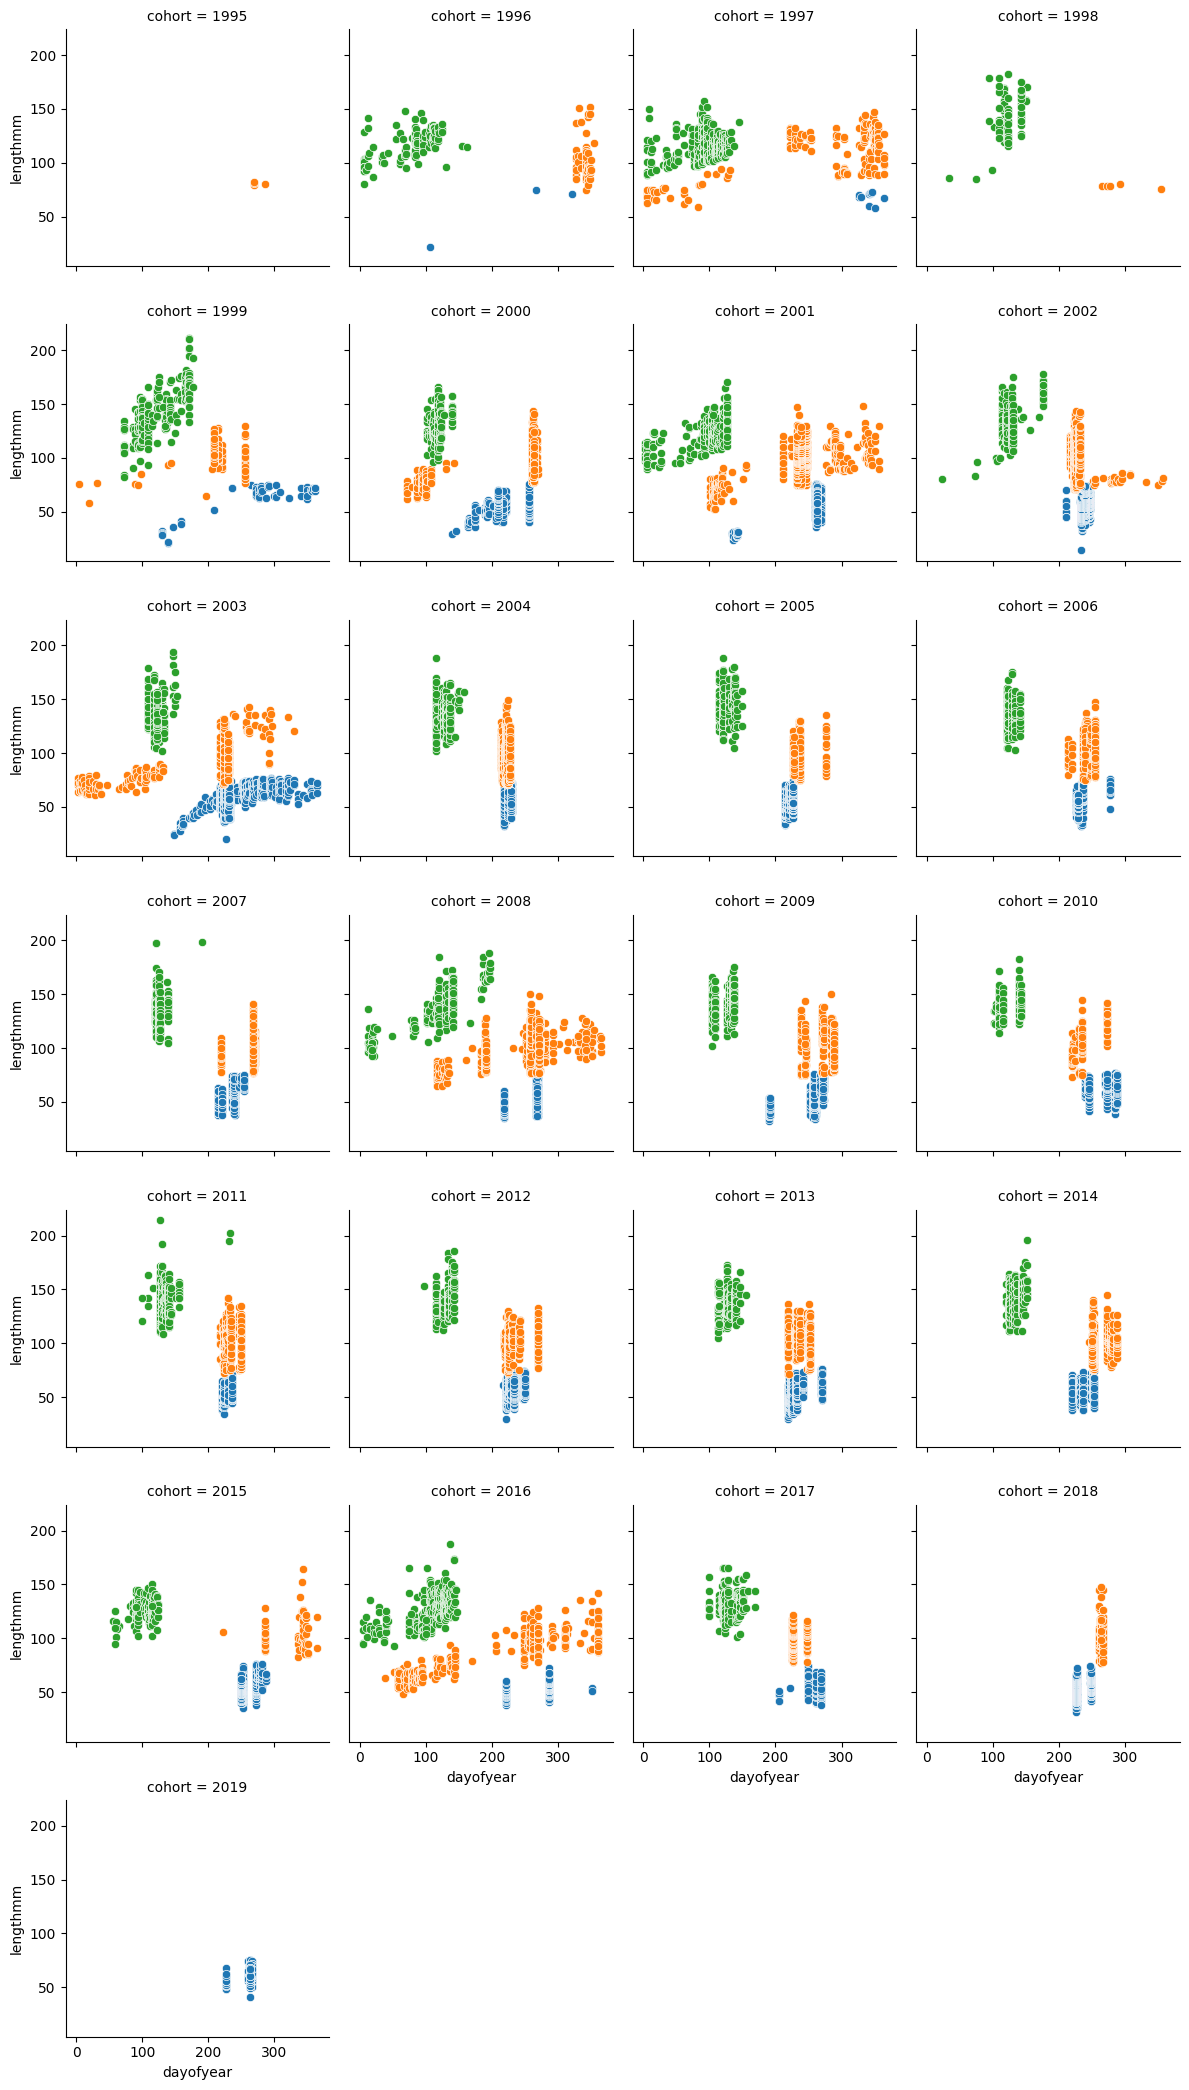

In [29]:
g = sns.FacetGrid(data = df, col = 'cohort', hue = 'age_class', col_wrap = 4)
g.map(sns.scatterplot, 'dayofyear', 'lengthmm')

# Aging function
The age of each fish is now simply the difference between date of 'pseudo egg deposition' and date of capture, which we can derive by accounting for by its age class. We've defined the 'pseudo egg deposition' to fall on the winter solstice the year before the cohort is observed in the river. Hence, start date must always be (in year, month, date): 'cohort - 1, 12, 21'. Now, we're only accounting for a two year smolt trajectory, hence we will only create a timeline two years ahead in time. So end date will be 'cohort+2, 12, 21'. At the time of 'pseudo egg deposition' the fish will be 0 days old.

In [30]:
from datetime import date

def Aging(df, fish = None, time_to_smolt = None):
    if time_to_smolt is not None:
        time_to_smolt = time_to_smolt

        cohort_list = []
        date_list = []
        age_list = []

        for cohort in df.cohort.unique():
            start_date = date(cohort-1, 12, 21)
            end_date = date(cohort+2, 12, 21)
            age = 0
            for single_date in daterange(start_date, end_date):
                cohort_list.append(cohort)
                date_list.append(single_date.strftime('%Y-%m-%d'))
                age_list.append(age)
                age += 1
    
        timeline =  zip(cohort_list, date_list, age_list)
        timeline = pd.DataFrame(list(timeline), columns = ['cohort', 'date', 'age'])
        timeline['date'] = pd.to_datetime(timeline.date)
        if fish is not None:
            timeline = pd.merge(timeline, fish, on = ['date', 'cohort'], how = 'inner')
            return(timeline)
        else:
            return(timeline)
    elif time_to_smolt is None:
        time_to_smolt = 2

        cohort_list = []
        date_list = []
        age_list = []

        for cohort in df.cohort.unique():
            start_date = date(cohort-1, 12, 21)
            end_date = date(cohort+2, 12, 21)
            age = 0
            for single_date in daterange(start_date, end_date):
                cohort_list.append(cohort)
                date_list.append(single_date.strftime('%Y-%m-%d'))
                age_list.append(age)
                age += 1
    
        timeline =  zip(cohort_list, date_list, age_list)
        timeline = pd.DataFrame(list(timeline), columns = ['cohort', 'date', 'age'])
        timeline['date'] = pd.to_datetime(timeline.date)
    if fish is not None:
        timeline = pd.merge(timeline, fish, on = ['date', 'cohort'], how = 'inner')
        return(timeline)
    else:
        return(timeline)

In [31]:
df = Aging(df, df, 2)

In [32]:
df

,cohort,date,age,dayofyear,lengthmm,river,age_class
0,1997,1997-11-23,337,327,68.0,Roug,0
1,1997,1997-11-23,337,327,70.0,Roug,0
2,1997,1997-11-25,339,329,68.0,Roug,0
3,1997,1997-12-08,352,342,71.0,Roug,0
4,1997,1997-12-08,352,342,60.0,Roug,0
...,...,...,...,...,...,...,...
37253,2019,2019-09-23,276,266,67.0,Goul,0
37254,1995,1996-09-25,644,269,79.0,Roug,1
37255,1995,1996-09-25,644,269,81.0,Roug,1
37256,1995,1996-09-25,644,269,82.0,Roug,1


# Useful Figures

Text(0, 0.5, 'Fork Length (mm)')

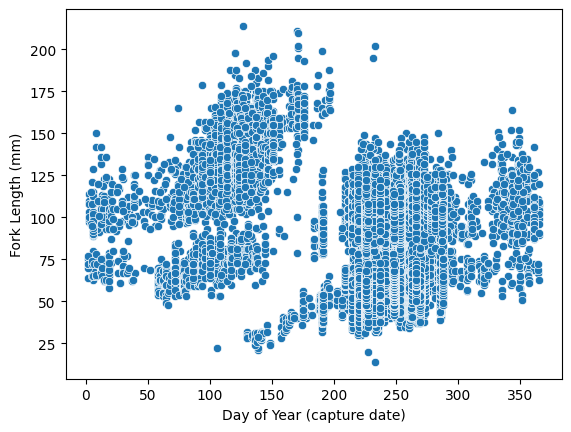

In [33]:
sns.scatterplot(data = df, x = 'dayofyear', y = 'lengthmm')
plt.xlabel('Day of Year (capture date)')
plt.ylabel(r'Fork Length (mm)')


In [34]:
df = df.rename(columns = {'age_class': 'Age Class'})

Text(0, 0.5, 'Fork Length (mm)')

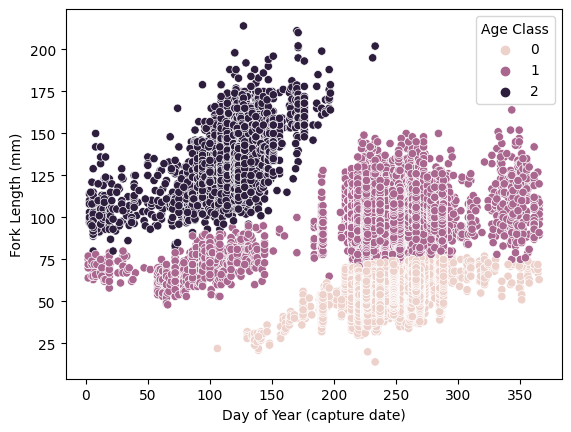

In [35]:
sns.scatterplot(data = df, x ='dayofyear', y = 'lengthmm', hue = 'Age Class')
plt.xlabel('Day of Year (capture date)')
plt.ylabel(r'Fork Length (mm)')

Text(0, 0.5, 'Fork Length (mm)')

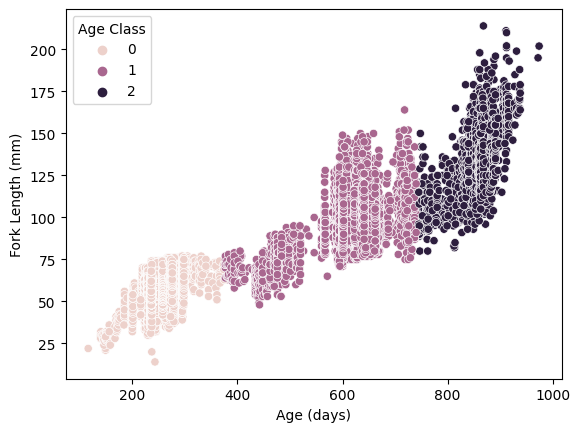

In [36]:
sns.scatterplot(data = df, x = 'age', y = 'lengthmm', hue = 'Age Class')
plt.xlabel('Age (days)')
plt.ylabel(r'Fork Length (mm)')

Text(0.5, 0, 'Fork Length (mm)')

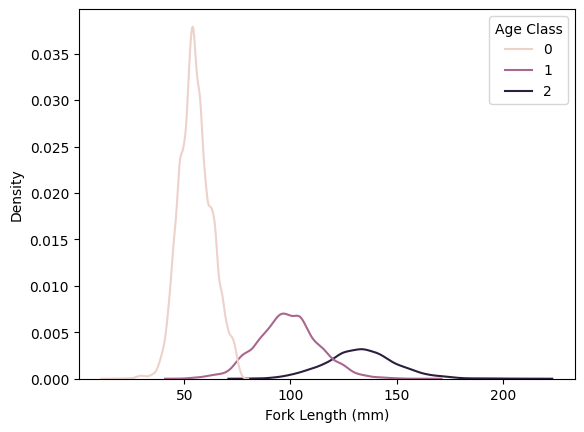

In [37]:
sns.kdeplot(data = df, x = 'lengthmm', hue = 'Age Class')
plt.xlabel('Fork Length (mm)')

# Save file

In [38]:
df[df.lengthmm.notna()]

,cohort,date,age,dayofyear,lengthmm,river,Age Class
0,1997,1997-11-23,337,327,68.0,Roug,0
1,1997,1997-11-23,337,327,70.0,Roug,0
2,1997,1997-11-25,339,329,68.0,Roug,0
3,1997,1997-12-08,352,342,71.0,Roug,0
4,1997,1997-12-08,352,342,60.0,Roug,0
...,...,...,...,...,...,...,...
37253,2019,2019-09-23,276,266,67.0,Goul,0
37254,1995,1996-09-25,644,269,79.0,Roug,1
37255,1995,1996-09-25,644,269,81.0,Roug,1
37256,1995,1996-09-25,644,269,82.0,Roug,1


In [39]:
from datetime import date
today = date.today()
df.rename(columns={'Age Class':'age_class'}, inplace = True)
df = df[df.cohort <= 2017]

#df.to_csv(rf'C:\Users\adria\Desktop\Growth_of_juvenile_Atlantic_salmon_Reproducible_code\Datasets\Observational\Marine Institute\Atlantic salmon\Processed\juvenile_atlantic_salmon_{today}.csv', index = False)